In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1)

import missingno as msno    # 누락값 표시
import warnings
import mglearn
warnings.filterwarnings('ignore')  # 워닝 무시
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm.score(X_test_scaled, y_test)

0.972027972027972

## 데이터 전처리와 매개변수 선택

In [3]:
# 잘못된 코드의 예시
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
grid.cv_results_

{'mean_fit_time': array([0.01276484, 0.009972  , 0.01017075, 0.00957322, 0.00957351,
        0.01376228, 0.01096935, 0.01097121, 0.01037135, 0.01057215,
        0.0113699 , 0.01496077, 0.01077008, 0.00777903, 0.01276436,
        0.00558238, 0.01157017, 0.01316385, 0.00917463, 0.0093729 ,
        0.00558434, 0.00478411, 0.01276412, 0.01715226, 0.00897508,
        0.00518556, 0.00339079, 0.00698371, 0.0149581 , 0.01495919,
        0.00558472, 0.00358849, 0.00977259, 0.00857668, 0.01495929,
        0.01456008]),
 'std_fit_time': array([0.00239306, 0.00189225, 0.00230922, 0.0010174 , 0.00279342,
        0.0068636 , 0.00209192, 0.00236012, 0.00232453, 0.00257128,
        0.0014912 , 0.00315538, 0.00400906, 0.00074671, 0.00641454,
        0.00205522, 0.00370869, 0.00203433, 0.00132384, 0.00149183,
        0.00079684, 0.00171621, 0.00116416, 0.00171635, 0.003277  ,
        0.00097866, 0.00048667, 0.0028213 , 0.00166736, 0.00199492,
        0.00079745, 0.00048925, 0.00980142, 0.00597106, 0.010

## 파이프라인 구축하기

In [4]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.972027972027972

## 그리드 서치에 파이프라인 적용하기

In [5]:
# 어느 단계의 매개변수인지 같이 입력한다.

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_params_                

{'svm__C': 1, 'svm__gamma': 1}

## 파이프라인 인터페이스

In [6]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(), SVC(C=100))
param_grid = {'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_score_

0.9812311901504789

In [7]:
# 단계 속성에 접근하기
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
pipe.fit(cancer.data)

# 'pca' 단계의 두 개 주성분을 추출한다.
components = pipe.named_steps['pca'].components_

In [8]:
# 그리드 서치 안의 파이프라인 속성에 접근하기
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid.fit(X_train, y_train)
# 파이프라인의 두 단계 중 LogisticRegression 단계의 최적의 모델 확인하기
grid.best_estimator_.named_steps['logisticregression']
grid.best_estimator_.named_steps['logisticregression'].coef_


array([[-0.43570655, -0.34266946, -0.40809443, -0.5344574 , -0.14971847,
         0.61034122, -0.72634347, -0.78538827,  0.03886087,  0.27497198,
        -1.29780109,  0.04926005, -0.67336941, -0.93447426, -0.13939555,
         0.45032641, -0.13009864, -0.10144273,  0.43432027,  0.71596578,
        -1.09068862, -1.09463976, -0.85183755, -1.06406198, -0.74316099,
         0.07252425, -0.82323903, -0.65321239, -0.64379499, -0.42026013]])

### 전처리와 모델의, 매개변수를 위한 그리드 서치

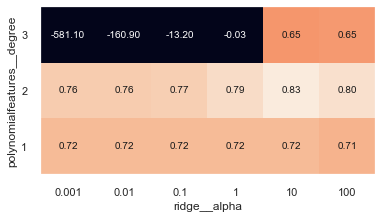

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

# 각 단계의 매개변수를 한 번에 그리드서치 하기
param_grid = {'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# 히트맵으로 나타내기
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3,-1),
                      xlabel='ridge__alpha', ylabel='polynomialfeatures__degree',
                      xticklabels=param_grid['ridge__alpha'],
                      yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

### 모델 선택을 위한 그리드 서치

In [15]:
# RandomForestClassifier와 SVC 비교하기
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
param_grid = [
    {'classifier':[SVC()], 'preprocessing':[StandardScaler()],
    'classifier__gamma': [0.01, 0.1, 1, 10, 100],
    'classifier__C': [0.01, 0.1, 1, 10, 100]},
    {'classifier':[RandomForestClassifier(n_estimators=100)],
    'classifier__max_features': [1, 2, 3], 'preprocessing': [None]}]

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

grid.best_params_


{'classifier': SVC(C=10, gamma=0.01),
 'classifier__C': 10,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler()}